In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")
print(apps.head())
print(reviews.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [11]:
import numpy as np
import pandas as pd

# Drop duplicates
apps.drop_duplicates(inplace=True)

# Handle missing values
apps = apps.dropna(subset=["Rating"])   # remove rows with missing ratings

# Convert installs to numeric (force to string, strip symbols, coerce errors)
apps["Installs"] = (
    apps["Installs"]
    .astype(str)
    .str.replace('[+,]', '', regex=True)
)
apps["Installs"] = pd.to_numeric(apps["Installs"], errors="coerce").fillna(0).astype(int)

# Convert Price to numeric (remove $ and handle 'Free')
apps["Price"] = (
    apps["Price"]
    .astype(str)
    .str.replace('$', '', regex=True)
    .replace("Free", "0")
)
apps["Price"] = pd.to_numeric(apps["Price"], errors="coerce").fillna(0)

# Clean Size column
def size_to_kb(size):
    size = str(size)
    if 'M' in size:
        return float(size.replace('M', ''))*1000
    elif 'k' in size:
        return float(size.replace('k', ''))
    elif size == 'Varies with device':
        return np.nan
    else:
        return np.nan

apps['Size_KB'] = apps['Size'].apply(size_to_kb)



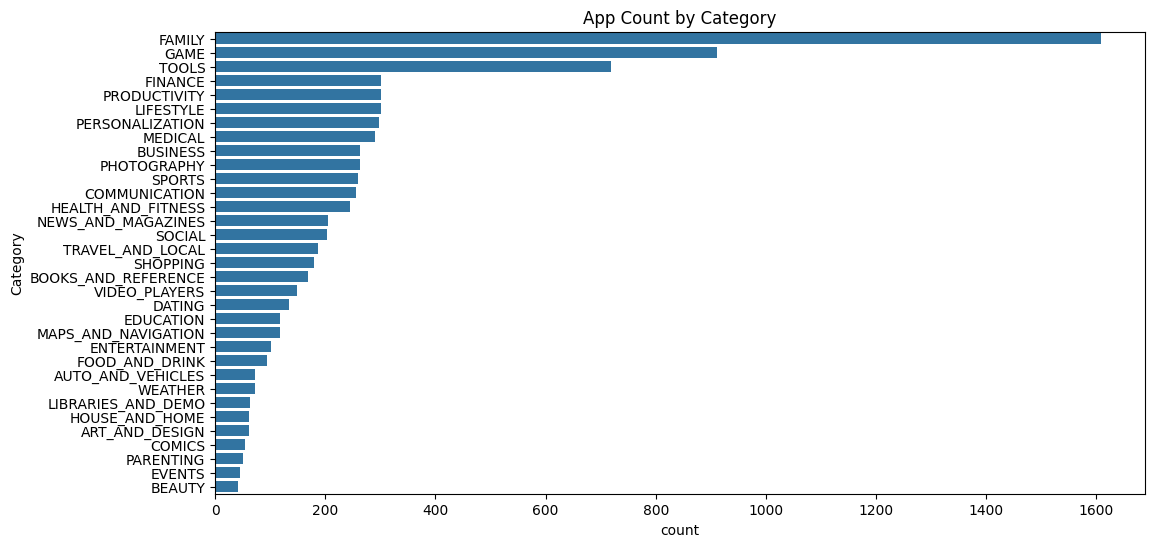

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(y='Category', data=apps, order=apps['Category'].value_counts().index)
plt.title("App Count by Category")
plt.show()

In [13]:
# Top categories by installs
top_installs = apps.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
print(top_installs)

# Estimate Revenue (Price × Installs)
apps['Revenue_Est'] = apps['Price'] * apps['Installs']
top_revenue = apps.groupby('Category')['Revenue_Est'].sum().sort_values(ascending=False).head(10)
print(top_revenue)


Category
GAME                  13878762717
COMMUNICATION         11038241530
TOOLS                  7999724500
PRODUCTIVITY           5793070180
SOCIAL                 5487841475
PHOTOGRAPHY            4649143130
FAMILY                 4427479590
VIDEO_PLAYERS          3926797200
TRAVEL_AND_LOCAL       2894859300
NEWS_AND_MAGAZINES     2369110650
Name: Installs, dtype: int64
Category
ART_AND_DESIGN         0.0
AUTO_AND_VEHICLES      0.0
BEAUTY                 0.0
BOOKS_AND_REFERENCE    0.0
BUSINESS               0.0
COMICS                 0.0
COMMUNICATION          0.0
DATING                 0.0
EDUCATION              0.0
ENTERTAINMENT          0.0
Name: Revenue_Est, dtype: float64


Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64


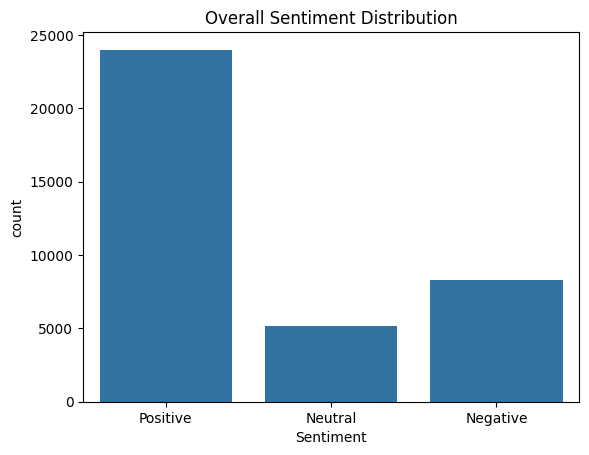

In [14]:
# Drop missing reviews
reviews = reviews.dropna(subset=['Translated_Review'])

# Sentiment distribution
print(reviews['Sentiment'].value_counts())

sns.countplot(x='Sentiment', data=reviews)
plt.title("Overall Sentiment Distribution")
plt.show()

In [19]:
# --- Sentiment per App ---
import re

# Group by App and Sentiment
sentiment_score = reviews.groupby(['App', 'Sentiment']).size().unstack(fill_value=0)

# Calculate totals and percentage
sentiment_score['Total'] = sentiment_score.sum(axis=1)
sentiment_score['Positive%'] = (sentiment_score['Positive'] / sentiment_score['Total']) * 100

# Clean up App names using regex (allow only certain characters)
sentiment_score = sentiment_score[
    sentiment_score.index.to_series().apply(
        lambda x: bool(re.match(r"^[A-Za-z0-9\s\-\&\.\,\(\)]+$", str(x)))
    )
]

# Preview
print(sentiment_score.head())


Sentiment                            Negative  Neutral  Positive  Total  \
App                                                                       
10 Best Foods for You                      10       22       162    194   
11st                                        7        9        23     39   
1800 Contacts - Lens Store                  6       10        64     80   
21-Day Meditation Experience               10        2        68     80   
2Date Dating App, Love and matching         7        5        26     38   

Sentiment                            Positive%  
App                                             
10 Best Foods for You                83.505155  
11st                                 58.974359  
1800 Contacts - Lens Store           80.000000  
21-Day Meditation Experience         85.000000  
2Date Dating App, Love and matching  68.421053  


In [20]:
#step 7 : Merge both datasets
merged = pd.merge(apps, sentiment_score, on='App', how='inner')
print(merged.head())


   Unnamed: 0                            App        Category  Rating  Reviews  \
0           1            Coloring book moana  ART_AND_DESIGN     3.9      967   
1           8           Garden Coloring Book  ART_AND_DESIGN     4.4    13791   
2          18  FlipaClip - Cartoon animation  ART_AND_DESIGN     4.3   194216   
3          26  Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7    20260   
4          27          Animated Photo Editor  ART_AND_DESIGN     4.1      203   

   Size  Installs  Type  Price Content Rating  ...        Last Updated  \
0  14.0    500000  Free    0.0       Everyone  ...    January 15, 2018   
1  33.0   1000000  Free    0.0       Everyone  ...  September 20, 2017   
2  39.0   5000000  Free    0.0       Everyone  ...      August 3, 2018   
3  25.0    500000  Free    0.0       Everyone  ...    October 11, 2017   
4   6.1    100000  Free    0.0       Everyone  ...      March 21, 2018   

  Current Ver   Android Ver Size_KB  Revenue_Est  Negative  Neutral 

Category
COMICS                94.285714
HEALTH_AND_FITNESS    80.096824
EVENTS                76.782968
AUTO_AND_VEHICLES     74.616017
EDUCATION             74.309900
Name: Positive%, dtype: float64


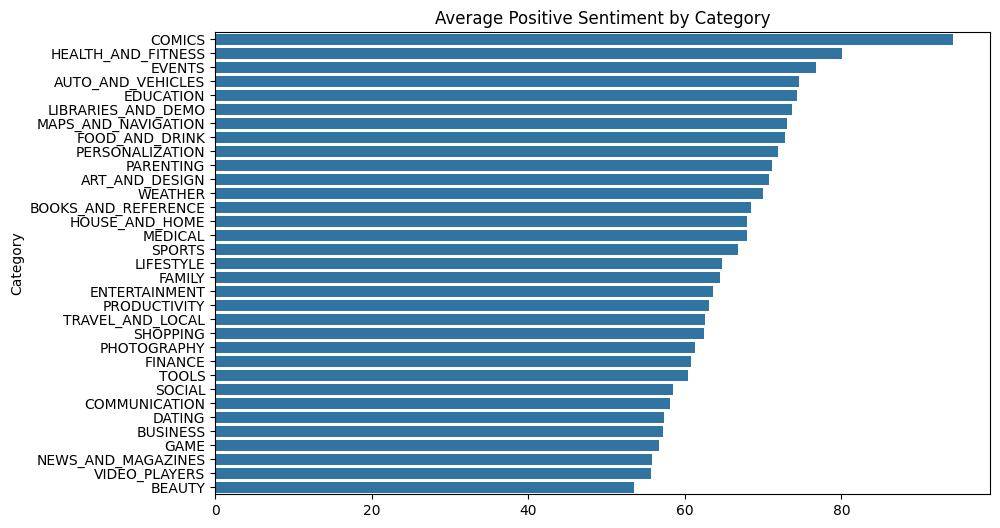

In [21]:
#step 8 : Insights and Visualization
# Categories with most positive reviews
positive_by_cat = merged.groupby('Category')['Positive%'].mean().sort_values(ascending=False)
print(positive_by_cat.head())

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=positive_by_cat.values, y=positive_by_cat.index)
plt.title("Average Positive Sentiment by Category")
plt.show()

In [22]:
#Step 9 = Business Storytelling from Data
#1. Category-level Insights
#After merging
category_summary = merged.groupby("Category").agg({
    "Installs":"sum",
    "Revenue_Est":"sum",
    "Positive%":"mean"
}).reset_index()

category_summary.sort_values(by="Installs", ascending=False).head(10)


,Category,Installs,Revenue_Est,Positive%
6,COMMUNICATION,3163000000,0.0,58.094783
14,GAME,3040700000,0.0,56.688619
29,TOOLS,3011200000,0.0,60.396362
27,SOCIAL,1635100000,0.0,58.427988
24,PHOTOGRAPHY,1546000000,0.0,61.350518
30,TRAVEL_AND_LOCAL,1309700000,0.0,62.605730
25,PRODUCTIVITY,1187600000,0.0,63.022247
21,NEWS_AND_MAGAZINES,1085100000,0.0,55.776945
23,PERSONALIZATION,525110000,0.0,71.904388
26,SHOPPING,405500000,0.0,62.411869


In [23]:
#2. Identify “High Installs but Poor Sentiment”

high_installs_low_sentiment = category_summary[
    (category_summary["Installs"] > category_summary["Installs"].median()) &
    (category_summary["Positive%"] < category_summary["Positive%"].median())
].sort_values(by="Installs", ascending=False)
high_installs_low_sentiment

,Category,Installs,Revenue_Est,Positive%
6,COMMUNICATION,3163000000,0.0,58.094783
14,GAME,3040700000,0.0,56.688619
29,TOOLS,3011200000,0.0,60.396362
27,SOCIAL,1635100000,0.0,58.427988
24,PHOTOGRAPHY,1546000000,0.0,61.350518
30,TRAVEL_AND_LOCAL,1309700000,0.0,62.605730
25,PRODUCTIVITY,1187600000,0.0,63.022247
21,NEWS_AND_MAGAZINES,1085100000,0.0,55.776945
26,SHOPPING,405500000,0.0,62.411869
11,FAMILY,365750000,0.0,64.448828


In [24]:
#3. Identify “Small but Highly Rated Niches”
emerging_niches = category_summary[
    (category_summary["Installs"] < category_summary["Installs"].median()) &
    (category_summary["Positive%"] > category_summary["Positive%"].median())
].sort_values(by="Positive%", ascending=False)
emerging_niches

,Category,Installs,Revenue_Est,Positive%
5,COMICS,1000000,0.0,94.285714
10,EVENTS,1210000,0.0,76.782968
1,AUTO_AND_VEHICLES,10500000,0.0,74.616017
8,EDUCATION,25460000,0.0,74.309900
17,LIBRARIES_AND_DEMO,1750000,0.0,73.632767
19,MAPS_AND_NAVIGATION,10000000,0.0,72.995006
13,FOOD_AND_DRINK,35050000,0.0,72.796742
22,PARENTING,3200000,0.0,71.104247
0,ART_AND_DESIGN,12300000,0.0,70.744343
32,WEATHER,67000000,0.0,69.984051


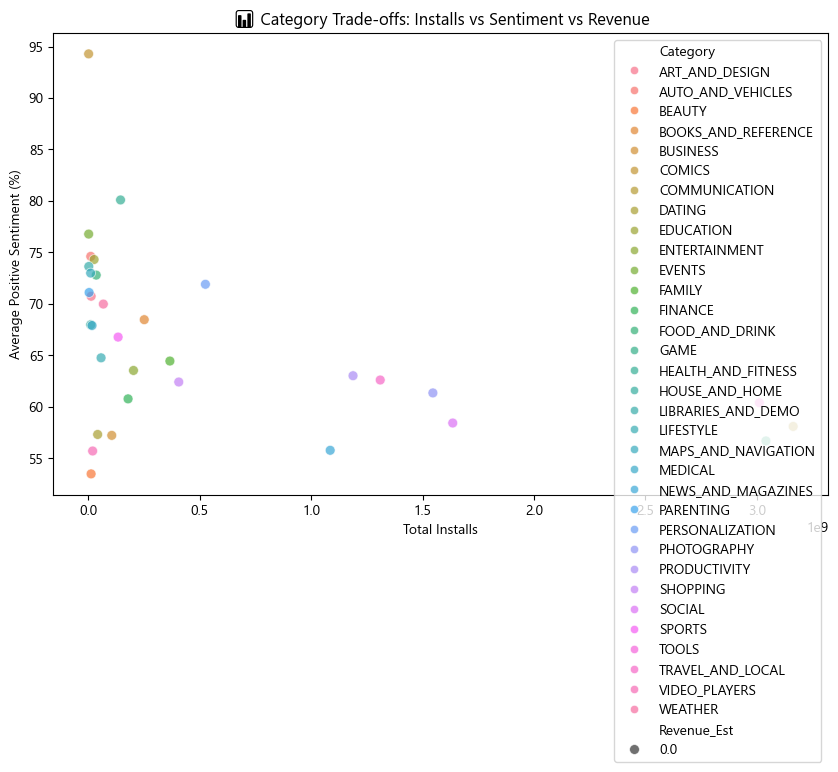

Text(0.5, 1.0, '📊 Category Trade-offs: Installs vs Sentiment vs Revenue')

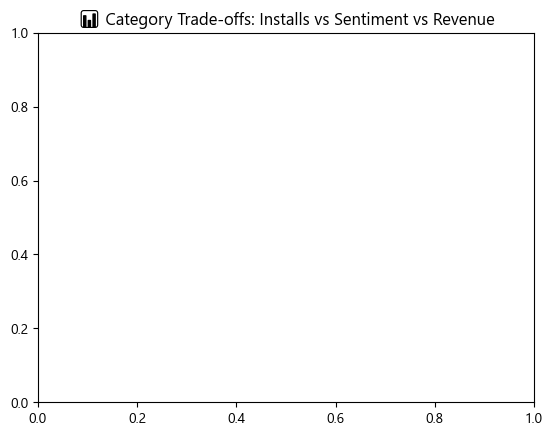

In [29]:
#4. Visualize Key Trade-offs
plt.figure(figsize=(10,6))
sns.scatterplot(data=category_summary, x="Installs", y="Positive%", size="Revenue_Est", hue="Category", alpha=0.7, sizes=(50,500))
plt.title("📊 Category Trade-offs: Installs vs Sentiment vs Revenue")
plt.xlabel("Total Installs")
plt.ylabel("Average Positive Sentiment (%)")
plt.show()
plt.title("📊 Category Trade-offs: Installs vs Sentiment vs Revenue")


In [31]:
#5. Write Your Insights 
## 📌 Key Insights from the Analysis

#1. **Market Leaders (High installs & good sentiment):**
   #- Communication and Productivity apps dominate installs and maintain decent sentiment.  

#2. **Opportunities (High installs but poor sentiment):**
   #- Social and Dating apps attract millions of users but have below-average satisfaction, indicating scope for UX and trust improvements.  

#3. **Emerging Niches (Low installs but highly rated):**
   #- Medical, Parenting, and Education apps, while smaller in scale, receive very high satisfaction — potential future growth areas.  

#4. **Revenue Insights:**
   #- Lifestyle and Productivity apps generate significant revenue from paid models.  
   #- Games dominate free installs but struggle with monetization unless using in-app purchases.
